### 予約をキャンセルするかしないかの分類問題です。

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

予測するのは'is_canceled'で、1がキャンセル、0が予約です。

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#データの型の確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#欠損値の確認
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
trace=go.Bar(
                        x=df['country'].value_counts().index,
                        y=df['country'].value_counts(),
                        name='Country')
layout=go.Layout(title='country',
                                legend=dict(orientation='h'))

data=[trace]
fig=go.Figure(data,layout)
iplot(fig)

In [6]:
#countryはPRTが圧倒的に多かった為、最頻値で補完
df['country']=df['country'].fillna(df['country'].mode()[0])

In [7]:
#childrenは欠損値が少ない為0で補完
df['children']=df['children'].fillna(0)

In [8]:
#agentの欠損値の割合を計算
print(df['agent'].value_counts().sum())
print(df['agent'].isnull().sum()/df['agent'].value_counts().sum())

103050
0.15856380397865114


In [9]:
#'agent','company'は欠損値が多く使えない為、削除
df.drop(columns=['agent','company'],axis=1,inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

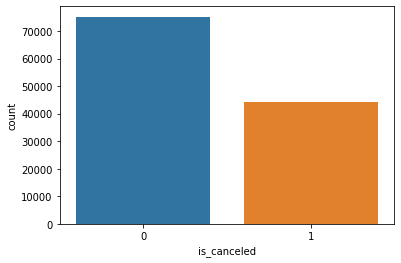

In [10]:
#キャンセルと予約の可視化
sns.countplot(df['is_canceled'])

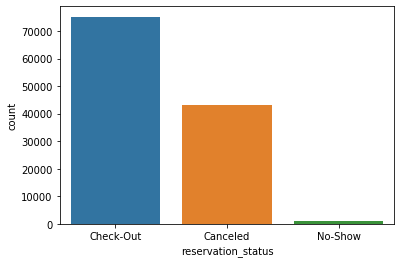

In [11]:
#チェックアウト済かキャンセルか連絡なくキャンセルかを可視化
sns.countplot(df['reservation_status'])

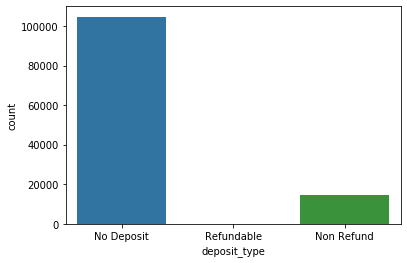

In [12]:
#事前に宿泊代を払うかどうか。Non Refundは返金できない。No Depositは前払い不要。Rrefundable deposit_typeは返金可能で前払い
sns.countplot(df['deposit_type'])

In [13]:
df.select_dtypes(exclude='object')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


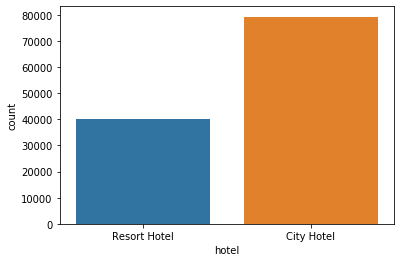

In [14]:
#ホテルタイプの可視化
sns.countplot(df['hotel'])

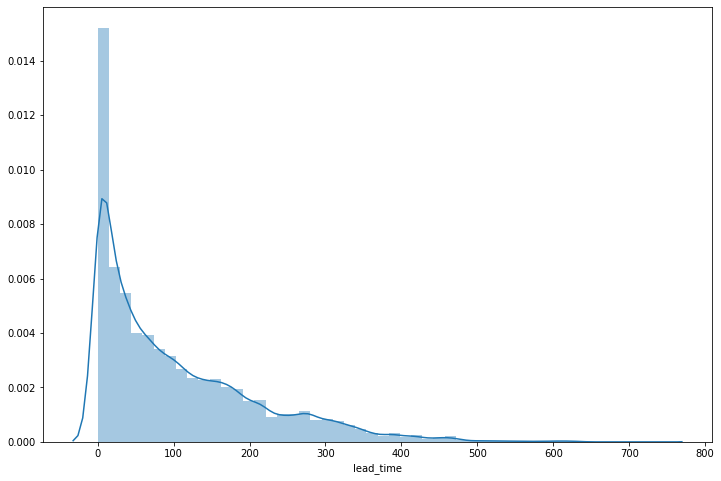

In [15]:
#lead_time(チェックインの何日前から予約したかのグラフ)
plt.figure(figsize=(12,8))
sns.distplot(df['lead_time'])

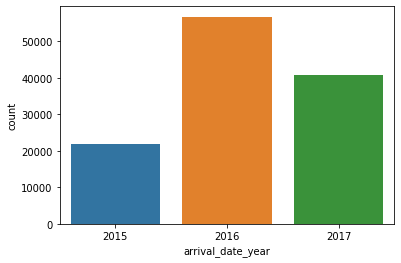

In [16]:
#年ごとでの予約（キャンセルも含む）
sns.countplot(df['arrival_date_year'])

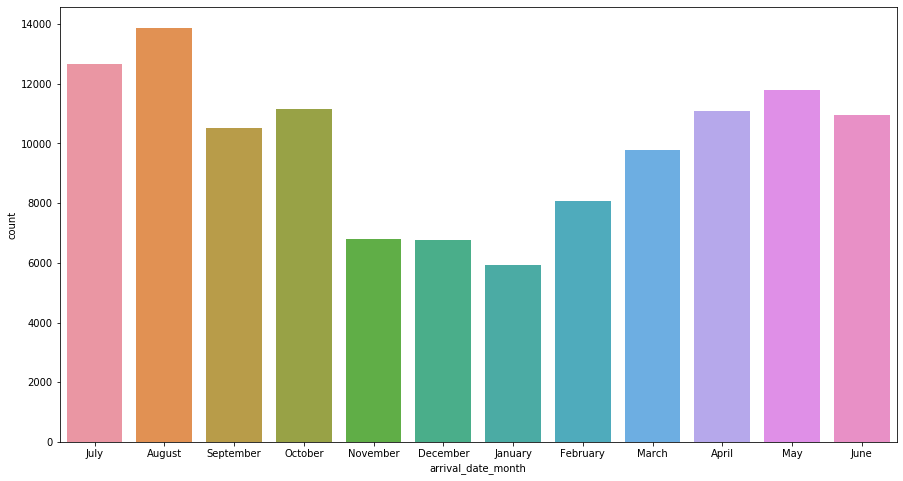

In [17]:
#月ごとでの予約（キャンセルも含む）
plt.figure(figsize=(15,8))
sns.countplot(df['arrival_date_month'])

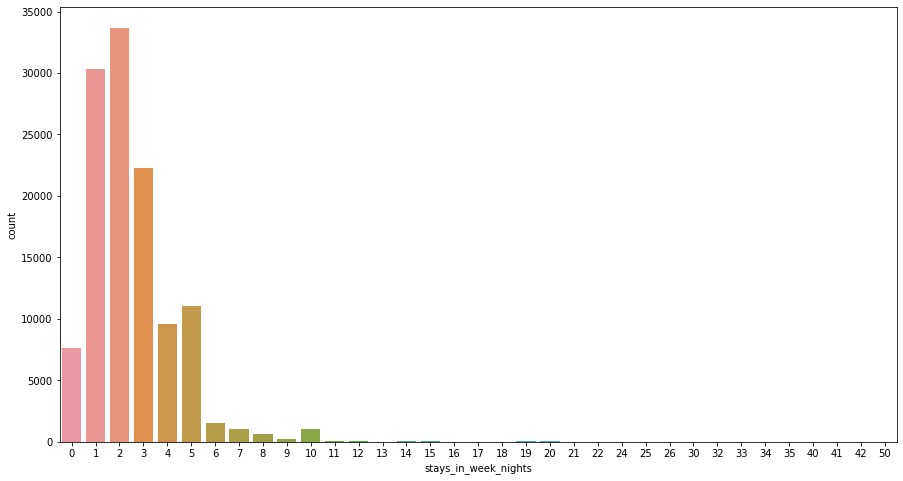

In [18]:
#stays_in_week_nights(泊まる日が平日だった日数)
plt.figure(figsize=(15,8))
sns.countplot(df['stays_in_week_nights'])

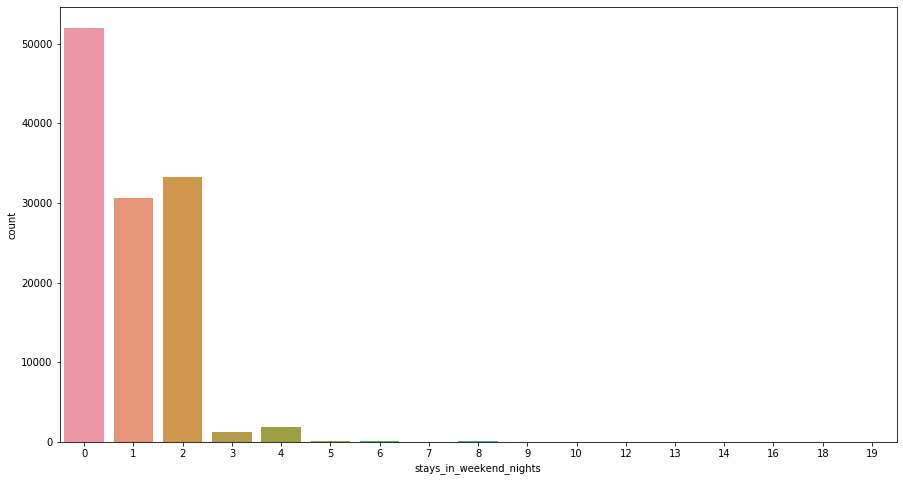

In [19]:
#stays_in_weekend_nights(泊まる日が週末だった日数)
plt.figure(figsize=(15,8))
sns.countplot(df['stays_in_weekend_nights'])

In [20]:
#キャンセルと予約だったもののadr(料金)の平均　　　　０が予約、1がキャンセル
df[['is_canceled','adr']].groupby('is_canceled').mean()

,adr
is_canceled,
0,99.987693
1,104.964333


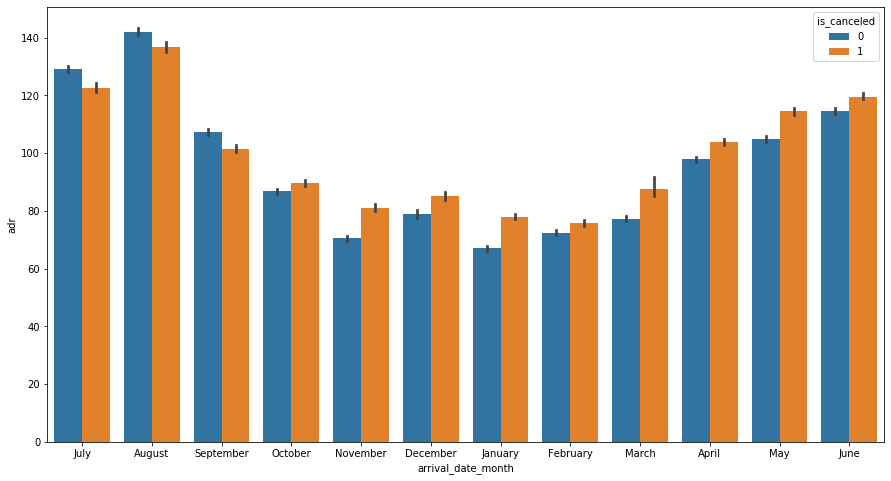

In [21]:
#利用月の可視化
plt.figure(figsize=(15,8))
sns.barplot(x=df['arrival_date_month'],y=df['adr'],hue='is_canceled',data=df)

In [22]:
#宿泊客がどこの国だったかの可視化
trace=go.Bar(
                        x=df['country'].value_counts().index,
                        y=df['country'].value_counts(),
                        name='Country')
layout=go.Layout(title='country',
                                legend=dict(orientation='h'))

data=[trace]
fig=go.Figure(data,layout)
iplot(fig)

In [23]:
#相関係数をざっと確認
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


In [24]:
#数値型でカテゴリ変数のものを確認
print(df['total_of_special_requests'].unique())
print(df['required_car_parking_spaces'].unique())
print(df['previous_bookings_not_canceled'].unique())

[0 1 3 2 4 5]
[0 1 2 8 3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [25]:
#データ型がobjectでいいかどうかを確認
df.select_dtypes(exclude='object')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [26]:
#数値型でカテゴリ変数のものを変換する
df['total_of_special_requests']=df['total_of_special_requests'].astype(str)
df['required_car_parking_spaces']=df['required_car_parking_spaces'].astype(str)
df['previous_bookings_not_canceled']=df['previous_bookings_not_canceled'].astype(str)
df['is_canceled']=df['is_canceled'].astype(str)

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [29]:
#チェックイン日や利用する曜日を特徴量として追加
df['arrival_date_month']=df['arrival_date_month'].map({'July':'07','August':'08','September':'09','October':'10','November':'11','December':'12',
                                                      'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06'})

df['arrival_date_month']=df['arrival_date_month'].astype(str)
df['arrival_date_year']=df['arrival_date_year'].astype(str)
df['arrival_date_day_of_month']=df['arrival_date_day_of_month'].astype(str)
df['is_repeated_guest']=df['is_repeated_guest'].astype(str)

df['check_in']=df['arrival_date_year']+df['arrival_date_month']+df['arrival_date_day_of_month']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in
0,Resort Hotel,0,342,2015,07,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015071
1,Resort Hotel,0,737,2015,07,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015071
2,Resort Hotel,0,7,2015,07,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015071
3,Resort Hotel,0,13,2015,07,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015071
4,Resort Hotel,0,14,2015,07,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015071


In [30]:
#チェックイン日や利用する曜日を特徴量として追加
df['check_in']=pd.to_datetime(df['check_in'],format='%Y%m%d')

In [31]:
#チェックイン日や利用する曜日を特徴量として追加
df['week']=df['check_in'].dt.dayofweek

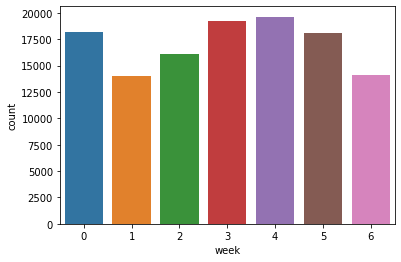

In [32]:
#曜日ごとでの予約数を可視化
df['week']=df['week'].astype(str)
sns.countplot(df['week'])

In [33]:
cat_features=df.select_dtypes(include='object')
num_features=df.select_dtypes(exclude='object')

In [34]:
cat_features.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,week
0,Resort Hotel,0,2015,07,1,BB,PRT,Direct,Direct,0,0,C,C,No Deposit,Transient,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,2015,07,1,BB,PRT,Direct,Direct,0,0,C,C,No Deposit,Transient,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,2015,07,1,BB,GBR,Direct,Direct,0,0,A,C,No Deposit,Transient,0,0,Check-Out,2015-07-02,2
3,Resort Hotel,0,2015,07,1,BB,GBR,Corporate,Corporate,0,0,A,A,No Deposit,Transient,0,0,Check-Out,2015-07-02,2
4,Resort Hotel,0,2015,07,1,BB,GBR,Online TA,TA/TO,0,0,A,A,No Deposit,Transient,0,1,Check-Out,2015-07-03,2


In [35]:
num_features.head()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,booking_changes,days_in_waiting_list,adr,check_in
0,342,27,0,0,2,0.0,0,0,3,0,0.0,2015-07-01
1,737,27,0,0,2,0.0,0,0,4,0,0.0,2015-07-01
2,7,27,0,1,1,0.0,0,0,0,0,75.0,2015-07-01
3,13,27,0,1,1,0.0,0,0,0,0,75.0,2015-07-01
4,14,27,0,2,2,0.0,0,0,0,0,98.0,2015-07-01


In [36]:
#arrival_date_week_number(到着日の年の週番号)　相関があるか確認
df[['is_canceled','arrival_date_week_number']].groupby('is_canceled',as_index=False).mean()

,is_canceled,arrival_date_week_number
0,0,27.080143
1,1,27.309696


In [37]:
#adults(大人の人数)に外れ値がないか確認。
num_features['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [38]:
#大人0人などがあったので最頻値で補完
df['adults']=df['adults'].fillna(df['adults'].mode()[0])

In [39]:
#children(子供の人数)に外れ値がないか確認。
num_features['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [40]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in,week
0,Resort Hotel,0,342,2015,07,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2
1,Resort Hotel,0,737,2015,07,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2
2,Resort Hotel,0,7,2015,07,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2
3,Resort Hotel,0,13,2015,07,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2
4,Resort Hotel,0,14,2015,07,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2


In [41]:
#曜日の取得でcheck_inは不要になったので削除
#新たにfamily（大人+子供+赤ちゃん）の特徴量を追加
df=df.drop('check_in',axis=1)
df['family']=df['adults']+df['children']+df['babies']

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,week,family
0,Resort Hotel,0,342,2015,07,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,2.0
1,Resort Hotel,0,737,2015,07,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,2.0
2,Resort Hotel,0,7,2015,07,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,1.0
3,Resort Hotel,0,13,2015,07,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,1.0
4,Resort Hotel,0,14,2015,07,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [43]:
#is_canceledと相関があるものなどを削除
df=df.drop(columns=['reservation_status','reservation_status_date','reserved_room_type','assigned_room_type',
                   'arrival_date_week_number','previous_cancellations','previous_bookings_not_canceled',
                   'days_in_waiting_list','stays_in_week_nights','booking_changes','distribution_channel'],axis=1)

- reservation_status(予約の状態がキャンセルか予約が分かり、説明変数に入れると正しく分類されない可能性がある)

その他、adr(料金)やbooking_changes(予約を変更した回数)などに関しても予約したかどうかがわかってしまう可能性がある特徴量を削除

In [44]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,...,country,market_segment,is_repeated_guest,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,week,family
0,Resort Hotel,0,342,2015,07,1,0,2,0.0,0,...,PRT,Direct,0,No Deposit,Transient,0.0,0,0,2,2.0
1,Resort Hotel,0,737,2015,07,1,0,2,0.0,0,...,PRT,Direct,0,No Deposit,Transient,0.0,0,0,2,2.0
2,Resort Hotel,0,7,2015,07,1,0,1,0.0,0,...,GBR,Direct,0,No Deposit,Transient,75.0,0,0,2,1.0
3,Resort Hotel,0,13,2015,07,1,0,1,0.0,0,...,GBR,Corporate,0,No Deposit,Transient,75.0,0,0,2,1.0
4,Resort Hotel,0,14,2015,07,1,0,2,0.0,0,...,GBR,Online TA,0,No Deposit,Transient,98.0,0,1,2,2.0


In [45]:
#数値型の特徴量をスケーリング
from sklearn.preprocessing import StandardScaler

num_col=['stays_in_weekend_nights','adults','children','babies','family','adr','lead_time']
for col in num_col:
    scaler=StandardScaler()
    df[col]=scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,adults,children,babies,...,country,market_segment,is_repeated_guest,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,week,family
0,Resort Hotel,0,2.227051,2015,07,1,-0.92889,0.247897,-0.260659,-0.081579,...,PRT,Direct,0,No Deposit,Transient,-2.015038,0,0,2,0.043967
1,Resort Hotel,0,5.923385,2015,07,1,-0.92889,0.247897,-0.260659,-0.081579,...,PRT,Direct,0,No Deposit,Transient,-2.015038,0,0,2,0.043967
2,Resort Hotel,0,-0.907814,2015,07,1,-0.92889,-1.478447,-0.260659,-0.081579,...,GBR,Direct,0,No Deposit,Transient,-0.530935,0,0,2,-1.340324
3,Resort Hotel,0,-0.851667,2015,07,1,-0.92889,-1.478447,-0.260659,-0.081579,...,GBR,Corporate,0,No Deposit,Transient,-0.530935,0,0,2,-1.340324
4,Resort Hotel,0,-0.842309,2015,07,1,-0.92889,0.247897,-0.260659,-0.081579,...,GBR,Online TA,0,No Deposit,Transient,-0.075810,0,1,2,0.043967


In [46]:
df.shape

(119390, 21)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  object 
 2   lead_time                    119390 non-null  float64
 3   arrival_date_year            119390 non-null  object 
 4   arrival_date_month           119390 non-null  object 
 5   arrival_date_day_of_month    119390 non-null  object 
 6   stays_in_weekend_nights      119390 non-null  float64
 7   adults                       119390 non-null  float64
 8   children                     119390 non-null  float64
 9   babies                       119390 non-null  float64
 10  meal                         119390 non-null  object 
 11  country                      119390 non-null  object 
 12  market_segment               119390 non-null  object 
 13 

In [48]:
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
is_repeated_guest              0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
week                           0
family                         0
dtype: int64

In [49]:
#説明変数をXに、目的変数をyに代入
X=df.drop(columns=['is_canceled'],axis=1)
y=df['is_canceled']
print(X.shape)
print(y.shape)

(119390, 20)
(119390,)


In [50]:
#カテゴリ変数をダミー変数の処理をしてデータとして扱えるように処理
X=pd.get_dummies(X,drop_first=True)
print(X.shape)
print(y.shape)

(119390, 259)
(119390,)


### 交差検証でモデル選択

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.svm import LinearSVC

In [52]:
KFold=KFold(n_splits=5,shuffle=True,random_state=0)
log_reg_cross=LogisticRegression()
Random_cross=RandomForestClassifier()
svc_cross=LinearSVC()

In [53]:
log_reg_score=cross_val_score(log_reg_cross,X,y,cv=KFold)
random_score=cross_val_score(Random_cross,X,y,cv=KFold)
svc_score=cross_val_score(svc_cross,X,y,cv=KFold)

In [54]:
print(log_reg_score.mean())
print(random_score.mean())
print(svc_score.mean())

0.8055113493592427
0.878071865315353
0.806223301784069


In [55]:
#訓練データとテストデータに分割
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [56]:
#モデルの作成
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.806202675839271
0.8027003484320557


In [57]:
from sklearn.metrics import f1_score

In [58]:
#モデルの作成
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
random_forest_score=random_forest.score(X_train,y_train)
pred_y=random_forest.predict(X_test)
print(random_forest.score(X_train,y_train))
print(random_forest.score(X_test,y_test))
print('f1_score:{}'.format(f1_score(y_test,pred_y,average='micro')))

0.99452770766791
0.8763401232913428
f1_score:0.8763401232913428


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#ランダムサーチ
params_random={RandomForestClassifier():{
                                'n_estimators':scipy.stats.randint(1,1000),
                                'max_depth':scipy.stats.randint(1,20),
                                'max_leaf_nodes':scipy.stats.randint(1,1000)
}}

model=None
max_score=0
best_param=None

for model,param in params_random.items():
    clf_random=RandomizedSearchCV(model,param)
    clf_random.fit(X_train,y_train)
    pred_y=clf_random.predict(X_test)
    score=f1_score(y_test,pred_y,average='micro')
    if score>max_score:
        max_score=score
        model=model.__class__.__name__
        best_param=clf_random.best_params_
        
print(model)
print(max_score)
print(best_param)

RandomForestClassifier
0.8176092200482444
{'max_depth': 17, 'max_leaf_nodes': 285, 'n_estimators': 209}
